# 第8章 回帰2:住宅の平均価格の予測

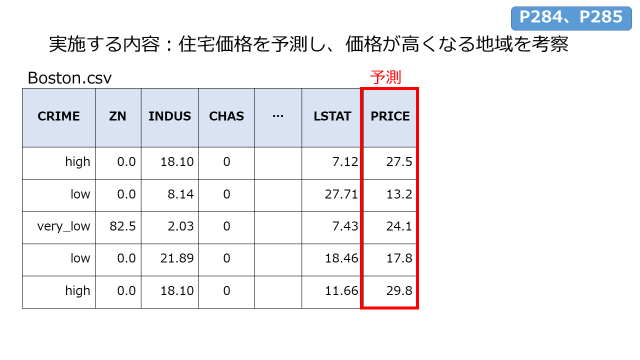

## 復習問題

**問1**  
'Boston.csv'を読み込み、PRICE列の内容を予測する決定木モデルを作成します。  
  
以下のコメントに沿って実装してください。  
※7章までに習った内容だけで実装して構いません

(1) CSVファイルをデータフレームに読み込んで、先頭2行を表示してください


In [ ]:
# pandas、LinearRegression、train_test_split関数のインポート
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# matplotlibの図をセルに表示するための設定
%matplotlib inline

# 'Boston.csv'の読み込み
df = pd.read_csv('Boston.csv')

# 先頭2行の確認
df.head()

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.70,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.60,27.71,13.2
2,very_low,82.5,2.03,0,0.415,6.162,38.4,6.2700,2.0,348,14.7,393.77,7.43,24.1
3,low,0.0,21.89,0,0.624,6.151,97.9,1.6687,4.0,437,21.2,396.90,18.46,17.8
4,high,0.0,18.10,0,0.614,6.980,67.6,2.5329,24.0,666,20.2,374.68,11.66,29.8


▶実行結果  
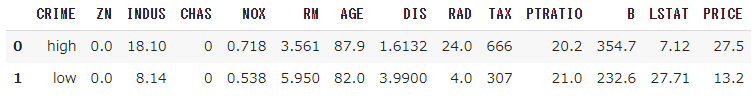

(2)文字列型の列において、データの種類ごとの出現回数を表示してください。

In [ ]:
# このデータで文字列型のデータは1つのみ。その列のデータごとの出現回数を表示する。
df['CRIME'].value_counts()

very_low    50
high        25
low         25
Name: CRIME, dtype: int64

▶実行結果  
very_low    50  
high        25  
low         25  
Name: CRIME, dtype: int64

(3)文字列型の列をダミー変数化し、元のデータフレームと横方向に結合したデータフレームを作成してください。  
また、作成したデータフレームの先頭2行を表示してください。  
* 結合後のデータフレームの変数名はdf2としてください。
* ダミー変数化ではdrop_first=Trueを指定してください。
* ダミー変数化前の列は削除してください。

In [ ]:
crime = pd.get_dummies(df['CRIME'], drop_first = True)
df2 = pd.concat([df, crime], axis = 1)
df2 = df2.drop(['CRIME'], axis = 1)

df2.head(2)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2,1,0


▶実行結果  
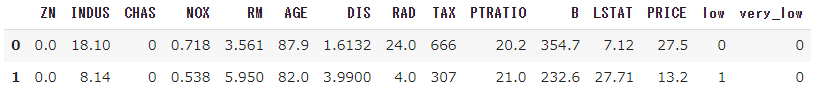

(4) データフレームから特徴量xと正解データtを抽出してください。  
特徴量は'INDUS', 'RM', 'PTRATION'とします。  

In [ ]:
x = df2[['INDUS','RM','PTRATIO']]
t = df2['PRICE']

(5)特徴量xと正解データtを、以下の条件で訓練データとテストデータに分割してください。
* テストデータは20%とする。
* 乱数シードは0とする
* 特徴量のうち訓練データはx_trainに代入する 
* 特徴量のうちテストデータはx_testに代入する 
* 正解データのうち訓練データはy_trainに代入する 
* 正解データのうちテストデータはy_testに代入する  

また、xの行数、列数、x_trainの行数列数、y_testの行数列数を表示してください。

In [ ]:
# 変数x、変数tを訓練データとテストデータに分割する
# * テストデータを20%とする
# * 乱数シードは0とする
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)

# xの行数、列数を表示する
print(x.shape)

# x_trainの行数、列数を表示する
print(x_train.shape)

# y_testの行数、列数を表示する
print(x_test.shape)

(100, 3)
(80, 3)
(20, 3)


(6)訓練データで重回帰モデルに学習させ、訓練データとテストデータでの決定係数を表示してください。

In [ ]:
# モデルのオブジェクトを作成する
model = LinearRegression()

# 訓練データでモデルに学習させる
model.fit(x_train, y_train)

# 訓練データでの決定係数(正解率)を表示する
print('訓練データでの決定係数:',model.score(x_train, y_train))

# テストデータでの決定係数(正解率)を表示する
print('検証データでの決定係数:',model.score(x_test, y_test))

訓練データでの決定係数: 0.49192360597339924
検証データでの決定係数: 0.6549365666015807


### 参考

(1)
* コード8-1
* コード8-2

(2)
* コード8-3

(3)
* コード8-4

(5)
* コード6-22

(6)
* コード6-24
* コード6-25


# 8.2 データの前処理

## 訓練データ、検証データ、テストデータの分割

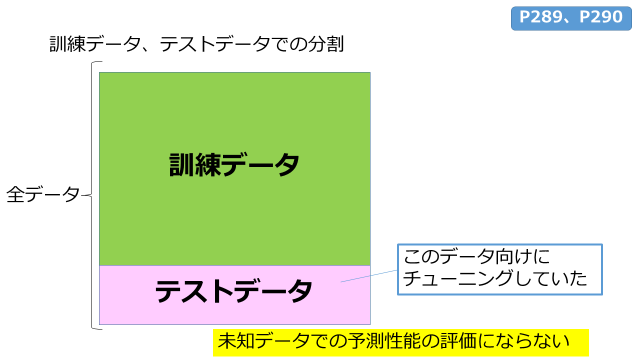

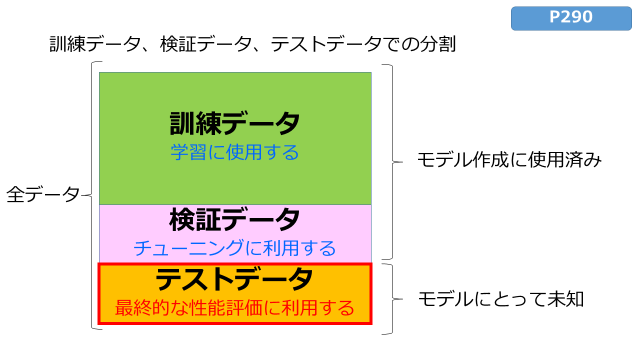

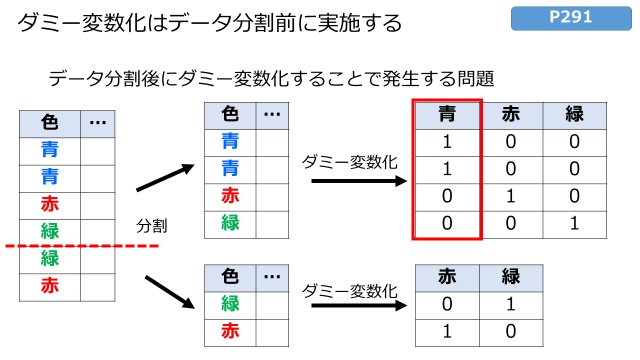

コード8-5 訓練データ＆検証データ と テストデータ(P292)

In [ ]:
# df2 を 訓練データ＆検証データ と テストデータ に分割する
# * テストデータは20%、乱数シードは0とする
# * 訓練データ＆検証データは変数train_valに代入する
# * テストデータは変数train_valに代入する
train_val, test = train_test_split(df2, test_size = 0.2, random_state = 0)

## 欠損値の処理

コード8-6 train_valの欠損値を確認する(P292)

In [ ]:
# 訓練データ＆検証データ の各列の欠損値の数を表示する
train_val.isnull().sum()

ZN          0
INDUS       0
CHAS        0
NOX         1
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
low         0
very_low    0
dtype: int64

コード8-7 欠損値を平均値で穴埋めする(P293)

In [ ]:
# 訓練データ＆検証データ の全ての欠損値を各列の平均値で穴埋めし、変数train_val2に代入する
train_val2 = train_val.fillna(train_val.mean()) 

## 外れ値の処理

* 外れ値があると、予測性能が上がりにくい  
* 外れ値は、散布図を使うと視覚的に見つけやすい
* **重回帰では予測に影響しない列があると、モデル全体の予測性能が低下することがある**

**特徴量として利用するカラムを取捨選択する**  

* 正解データと相関関係があるほど、予測に影響を与える可能性が高い

コード8-8 各特徴量の列とPRICE列の相関関係を示す散布図を描く(P293)

In [ ]:
# for文を使って、PRICE列とそれ以外の列の散布図を描く
colname = train_val2.columns
for name in colname:
    train_val2.plot(kind = 'scatter', x = name, y = 'PRICE')

* 散布図から 特徴量の候補となる列 を探す。また、特徴量候補となる列 に存在する外れ値を探す  
 （特徴量として使用しないカラムなら、外れ値の処理も不要）
* テストデータに外れ値が含まれる場合も考慮し、すべての外れ値を削除せず、**ある程度は残す**

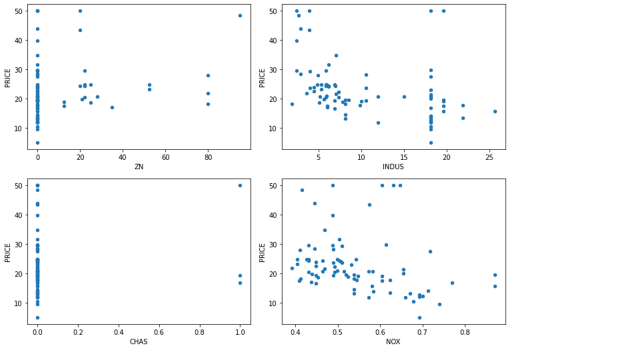

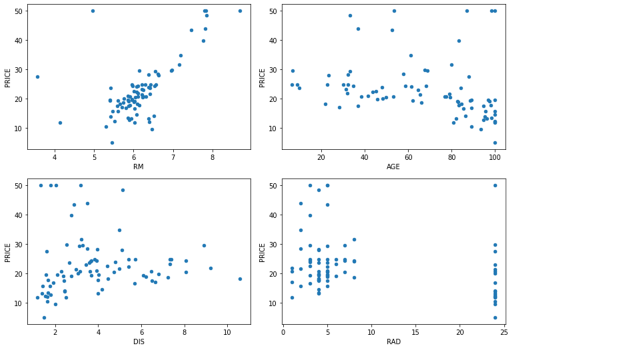

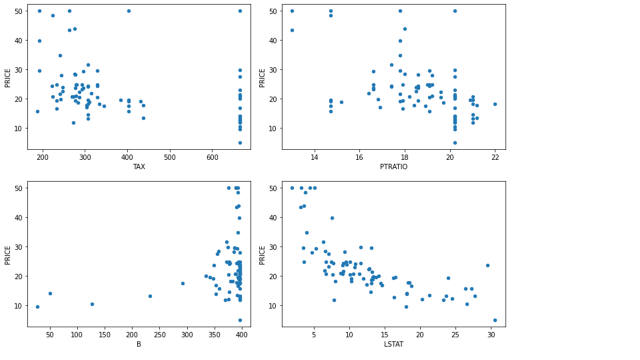

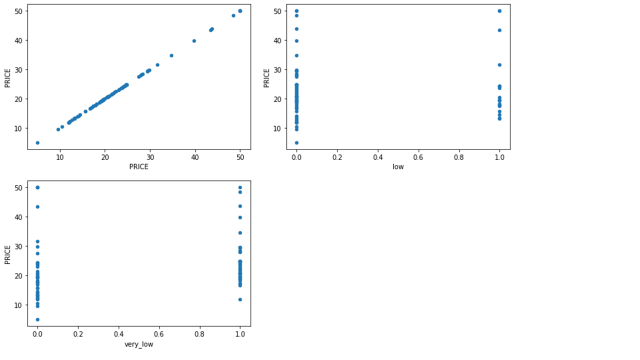

散布図から、PRICE列との相関係数がありそうな列として、'INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT'を特徴量の候補とする。  
RM、PTRATIOの外れ値を削除することとする。

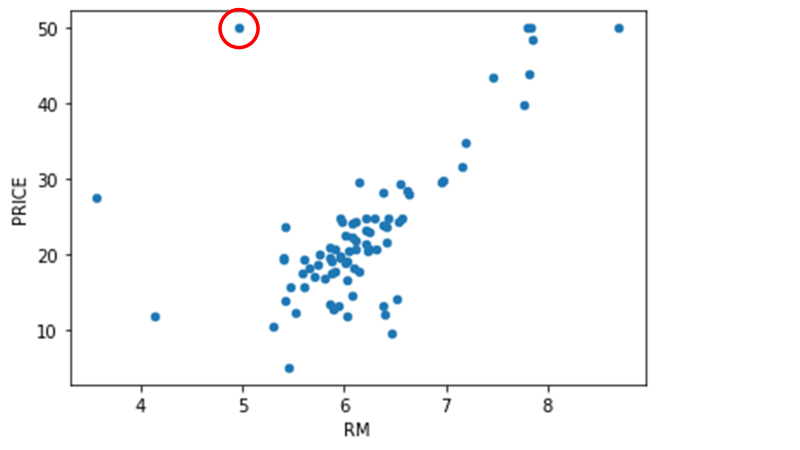

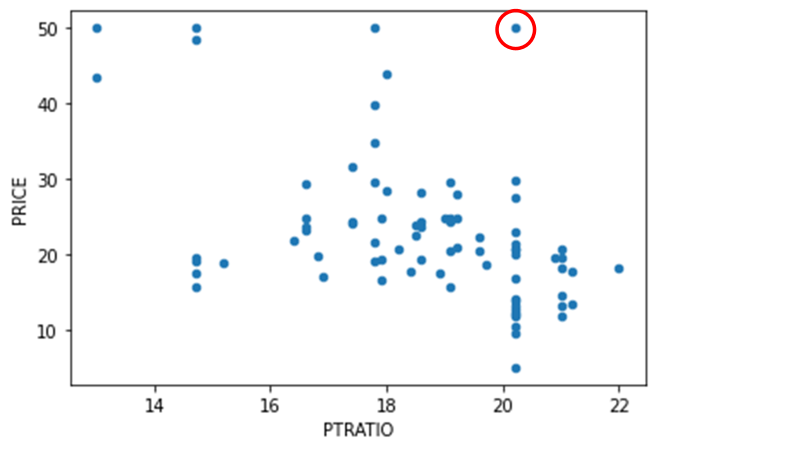

コード8-9 外れ値が存在するインデックスを確認する(P297)

In [ ]:
# train_val2のRMの外れ値のインデックスを取得する
out_line1 = train_val2[(train_val2['RM'] < 6) & (train_val2['PRICE'] > 40)].index

# train_val2のPTRATIOの外れ値のインデックスを取得する
out_line2 = train_val2[(train_val2['PTRATIO'] > 18) & (train_val2['PRICE'] > 40)].index

# 取得したインデックスを表示する
print('RMの外れ値のインデックス:', out_line1)
print('PTRATIOの外れ値のインデックス:', out_line2)

RMの外れ値のインデックス: Int64Index([76], dtype='int64')
PTRATIOの外れ値のインデックス: Int64Index([76], dtype='int64')


▶実行結果  
RMの外れ値のインデックス: Int64Index([76], dtype='int64')  
PTRATIOの外れ値のインデックス: Int64Index([76], dtype='int64')

コード8-10 外れ値を削除する(P298)

In [ ]:
# train_val2から外れ値を削除し、結果をtrain_val3に代入する
train_val3 = train_val2.drop([76], axis = 0)

# 削除後の行数、列数を表示する
train_val3.shape

(79, 15)

▶実行結果  
(79, 15)

コード8-11 絞り込んだ列以外を取り除く(P298)

In [ ]:
# train_val3から 特徴量の候補 と PRICE列 のみを取り出し、変数train_val4に代入する
train_val4 = train_val3[['INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT', 'PRICE']]

# train_val4の先頭3行を表示する
train_val4.head(3)

,INDUS,NOX,RM,PTRATIO,LSTAT,PRICE
43,5.86,0.431,6.108,19.1,9.16,24.3
62,5.86,0.431,6.957,19.1,3.53,29.6
3,21.89,0.624,6.151,21.2,18.46,17.8


▶実行結果  
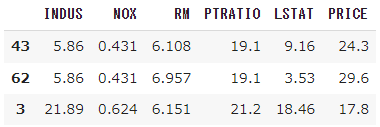

## 相関係数による特徴量の絞り込み

**相関係数を確認する**  
df**.corr()** … **相関行列**を取得する（データフレーム型）

コード8-12 列同士の相関係数を調べる(P300)

In [ ]:
# train_val4の相関行列を表示する
train_val4.corr()

,INDUS,NOX,RM,PTRATIO,LSTAT,PRICE
INDUS,1.000000,0.785722,-0.403129,0.249438,0.578406,-0.470889
NOX,0.785722,1.000000,-0.272996,0.077533,0.484295,-0.325289
RM,-0.403129,-0.272996,1.000000,-0.404568,-0.560454,0.753771
PTRATIO,0.249438,0.077533,-0.404568,1.000000,0.326563,-0.542449
LSTAT,0.578406,0.484295,-0.560454,0.326563,1.000000,-0.693490
PRICE,-0.470889,-0.325289,0.753771,-0.542449,-0.693490,1.000000


▶実行結果  
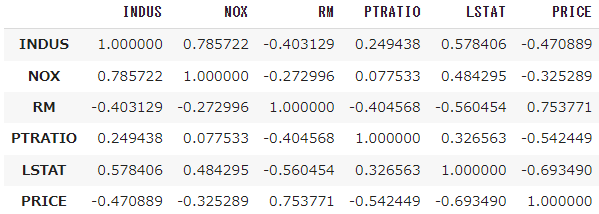

PRICE列と強い関係性のある列を確認したい。  
* PRICE列のものだけ確認したい
* 関係性には負の値もあるため、絶対値で確認したい  
* 関係性の強いものから順に並べたい


**シリーズの各要素に関数を適用する**  
se**.map(関数名)**

絶対値を取得する関数を適用するなら se.map(abs) とする。

**シリーズの要素を並び替える**  
se**.sort_values(ascending=●)**
* ascending … 昇順:True(デフォルト) / 降順:False

**データフレームの行を並び替える**  
df**.sort_values(by=▲, ascending=●)**
* by … 並べ替えの基準とする列名  
 列名はリスト形式で複数指定することも可能


コード8-13 各列とPRICE列との相関係数を見る(P300)

In [ ]:
# train_val4の相関行列のうち、PRICE列との相関係数のみを取り出し、変数train_corに代入する
train_cor = train_val4.corr()["PRICE"]

# train_corの内容を表示する
train_cor

INDUS     -0.470889
NOX       -0.325289
RM         0.753771
PTRATIO   -0.542449
LSTAT     -0.693490
PRICE      1.000000
Name: PRICE, dtype: float64

▶実行結果  
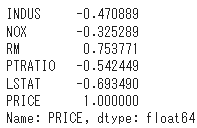

コード8-16 相関行列のPRICE列との相関係数を絶対値に変換する(P304)

In [ ]:
# 上記で取り出したtrain_cor(シリーズ)の各要素にabs関数を適用し、結果を変数abs_corに代入する
abs_cor = train_cor.map(abs)

# abs_corの内容を表示する
abs_cor

INDUS      0.470889
NOX        0.325289
RM         0.753771
PTRATIO    0.542449
LSTAT      0.693490
PRICE      1.000000
Name: PRICE, dtype: float64

▶実行結果  
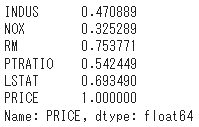

コード8-17 sort_valuesメソッドで要素を降順に並べ替える(P305)

In [ ]:
# abs_corを降順に並べ替える
abs_cor.sort_values(ascending = False)

PRICE      1.000000
RM         0.753771
LSTAT      0.693490
PTRATIO    0.542449
INDUS      0.470889
NOX        0.325289
Name: PRICE, dtype: float64

▶実行結果  
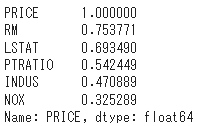

まずは、相関係数の大きい、RM、LSTAT、PTRATIOを特徴量とする。

相関係数、平均値は**外れ値の影響を受けやすい**。  
**外れ値の影響を受けやすい指標を活用する場合は、先に外れ値を除去する。**

## 訓練データと検証データの分割

コード8-18 訓練データと検証データに分割する(P306)

In [ ]:
# train_val4のRM、LSTAT、PTRATIOを特徴量xに代入する
x = train_val4[['RM', 'LSTAT', 'PTRATIO']]


# train_val4のPRICEを正解データtに代入する
t = train_val4[['PRICE']]

# 特徴量xと正解データtを、訓練データと検証データに分割する
# * 検証データは20%とします。
# * 乱数シードは0とする
# * 特徴量のうち訓練データはx_trainに代入する
# * 特徴量のうち検証データはx_valに代入する
# * 正解データのうち訓練データはy_trainに代入する
# * 正解データのうち検証データはy_valに代入する
x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0)

## データの標準化

特徴量を比較しやすくしておく

例）  
興行収入 = (**10** × SNS投稿数) + (**100** × 映画出演数) + 10  
SNS投稿数、映画出演数は、それぞれ「1」だけ変化するときの重みが違う。  
係数の大小だけで影響度合いを比較できない。 

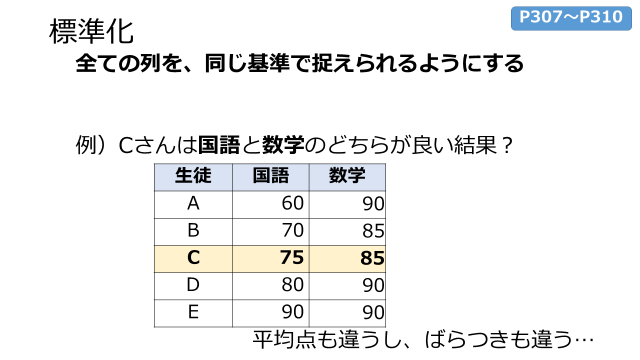

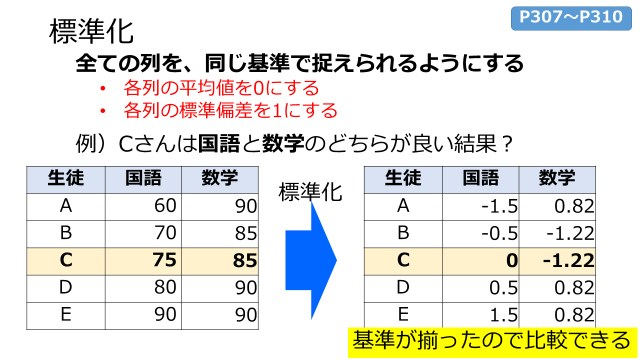

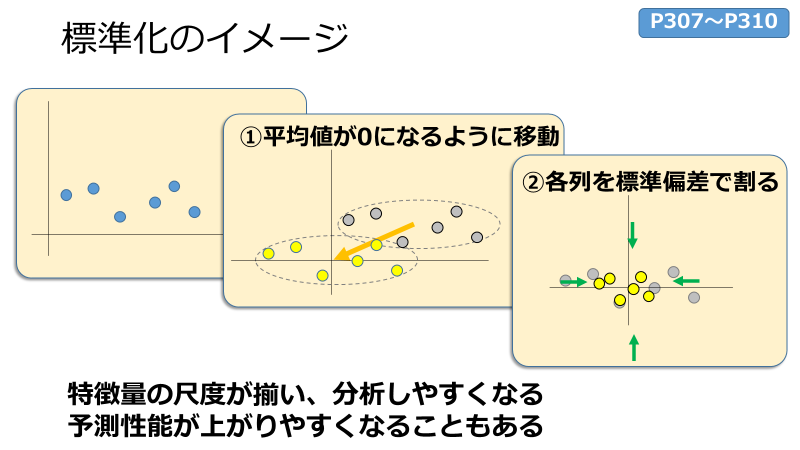

**標準化を使用する**  
* StandardScalerをインポートする  
 **from sklearn.preprocessing import StandardScaler**

* スケーラーを作成する  
 model = **StandardScaler()**

* スケーラーに、標準化で使用する平均値や標準偏差の情報を取得させる  
model**.fit(情報源とするデータフレーム)**

* 標準化する  
model**.transform(標準化するデータフレーム)**

コード8-19 scikit-learnのpreprocessingモジュールを使う(P311)

In [ ]:
# sklearn.preprocessing から StandardScaler をインポートする 
from sklearn.preprocessing import StandardScaler

# スケーラーを生成し、変数sc_model_xに代入する
sc_model_x = StandardScaler()


# スケーラーに、標準化で使用するx_trainの情報を取得させる
sc_model_x.fit(x_train)

# x_trainを標準化し、変数sc_xに代入する
sc_x = sc_model_x.transform(x_train)

# 標準化した結果を表示する
sc_x

array([[-0.10238334, -0.89546338, -0.97250163],
       [-0.11741281, -0.37386886,  1.21732721],
       [-0.92274224,  2.49984836,  0.83648742],
       [ 1.60346221, -1.37747891, -2.59107078],
       [-0.21134704, -0.36821472, -0.30603198],
       [ 0.28337322, -0.54632017, -0.87729168],
       [ 2.01927772, -1.55275729, -1.7817862 ],
       [-0.42551707, -0.58448562,  0.36043767],
       [-0.39420567,  0.21557535, -1.7817862 ],
       [-0.21886178, -0.00634969,  0.02720284],
       [-0.48438252,  0.24525959,  0.83648742],
       [ 0.02411475,  0.04453758,  0.83648742],
       [ 0.31092726, -1.31669689,  0.31283269],
       [ 2.08315299, -1.28559912, -1.7817862 ],
       [-0.98411261,  1.56550154,  0.07480782],
       [-0.28398951,  0.07704889, -0.78208173],
       [-0.9039554 ,  1.91040415, -1.7817862 ],
       [ 0.23828479,  1.52450902,  0.83648742],
       [-0.12993738, -0.28622968, -0.49645188],
       [-0.18629791, -0.73573389,  0.55085757],
       [-0.37917619,  0.48697412,  0.836

▶実行結果  
(抜粋)  
array([[-0.10238334, -0.89546338, -0.97250163],  
       [-0.11741281, -0.37386886,  1.21732721],  
       [-0.92274224,  2.49984836,  0.83648742],  
...

コード8-20 平均値が0になることを確認する(P311)

コード8-21 標準偏差が1になることを確認する(P311)

In [ ]:
# sc_x(array型)の平均値、標準偏差を確認する。
# Pandasで計算して表示するため、sc_xをデータフレームにし、変数tmp_dfに代入する。
# データフレームの列名は、x_trainの列名を指定する。
tmp_df = pd.DataFrame(sc_x, columns = x_train.columns)

# tmp_dfの平均値を表示する
print('平均値')
print(tmp_df.mean())


# tmp_dfの標準偏差を表示する
print('標準偏差')
print(tmp_df.std())

平均値
RM        -3.559763e-16
LSTAT      1.727014e-16
PTRATIO   -1.436241e-16
dtype: float64
標準偏差
RM         1.008032
LSTAT      1.008032
PTRATIO    1.008032
dtype: float64


▶実行結果  
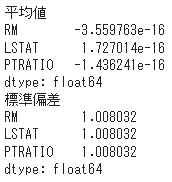

e-16 = ×0.1の16乗

コード8-22 正解データを標準化する(P312)

In [ ]:
# スケーラーを生成し、変数sc_model_yに代入する
sc_model_y = StandardScaler()
# sc_model_y =__空欄__

# スケーラーに、標準化で使用するy_trainの情報を取得させる
sc_model_y.fit(y_train)
# sc_model_y.__空欄__

# y_trainを標準化し、変数sc_yに代入する
sc_y = sc_model_y.transform(y_train)
# sc_y = sc_model_y.__空欄__

# 標準化した結果を表示する
sc_y

array([[-0.05270192],
       [-0.44023557],
       [-1.82278806],
       [ 2.2096567 ],
       [-0.33549674],
       [ 0.12535409],
       [ 2.89045906],
       [-0.14696686],
       [-0.52402663],
       [ 0.01014138],
       [-0.58686992],
       [-0.10507133],
       [ 0.25104068],
       [ 2.73335082],
       [-0.32502286],
       [-0.28312733],
       [-0.71255651],
       [-0.97440357],
       [ 0.16724962],
       [-0.20981015],
       [-1.0162991 ],
       [ 0.7747348 ],
       [ 0.08345856],
       [ 0.5338355 ],
       [-1.2571984 ],
       [ 0.75378703],
       [ 0.75378703],
       [-1.05819463],
       [-0.36691839],
       [ 0.20914515],
       [-0.4821311 ],
       [-0.96392969],
       [-0.29360121],
       [-0.02128027],
       [ 2.89045906],
       [-0.34597063],
       [ 0.19867126],
       [ 0.62810044],
       [-1.34098946],
       [ 2.24107835],
       [ 0.13582797],
       [-1.0791424 ],
       [-0.60781769],
       [ 0.25104068],
       [-0.18886239],
       [ 0

▶実行結果  
（抜粋）  
array([[-0.05270192],  
       [-0.44023557],  
       [-1.82278806],  
...

# 8.3 モデルの作成と学習

コード8-23 標準化したデータで学習させる(P314)

In [ ]:
# 線形回帰モデルのオブジェクトを生成する
model = LinearRegression()

# 線形回帰モデルに、標準化したデータ（特徴量sc_x、正解データsc_y）を学習させる
model.fit(sc_x, sc_y)

LinearRegression()

▶実行結果  

# 8.4 モデルの評価とチューニング

訓練データを標準化して学習させた場合、検証データも**訓練データの情報を使って**標準化する  
今回、スケーラー sc_model_x、sc_model_y に訓練データの平均値、標準偏差の情報を格納しているので、これを使用して標準化する

コード8-25 検証データを標準化する(P316)

In [ ]:
# 検証データの特徴量x_valを【訓練データの特徴量の情報】で標準化し、変数sc_x_valに代入する
sc_x_val = sc_model_x.transform(x_val)

# 検証データの正解データy_valを【訓練データの正解データの情報】で標準化し、変数sc_y_valに代入する
sc_y_val = sc_model_y.transform(y_val)

# 【標準化した検証データ】で決定係数を計算する
model.score(sc_x_val, sc_y_val)

0.7359028880291

▶実行結果  
0.7359028880291

## チューニング

特徴量を変えながら性能を確認するため、一連の流れを関数にしておく。

コード8-27 learn関数の定義(P318)

In [ ]:
# 以下の関数を定義する

# 引数として、特徴量、正解データを受け取る
# 以下の手順を行う
# ① 特徴量、正解データを　訓練データ、検証データに分割する
# ② 訓練データの特徴量、正解データを標準化する
# ③ 線形回帰モデルに標準化した訓練データを学習させる
# ④ 検証データの特徴量、正解データを標準化する
# ⑤ 訓練データ、テストデータそれぞれの決定係数を求める

# 戻り値として、訓練データの正解率、検証データの正解率、を返す

def learn(x, t):
  # ①
  x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0)

  # ②
  sc_model_x = StandardScaler()
  sc_model_y = StandardScaler()
  sc_model_x.fit(x_train)
  sc_x_train = sc_model_x.transform(x_train)
  sc_model_y.fit(y_train)
  sc_y_train = sc_model_y.transform(y_train)

  # ③
  model = LinearRegression()
  model.fit(sc_x_train, sc_y_train)

  # ④
  sc_x_val = sc_model_x.transform(x_val)
  sc_y_val = sc_model_y.transform(y_val)

  # ⑤
  train_score = model.score(sc_x_train, sc_y_train)
  val_score = model.score(sc_x_val, sc_y_val)

  # 結果を返す
  return train_score, val_score


コード8-28 learn関数を実行する(P319)

In [ ]:
# train_val3（ダミー変数化、欠損値処理、外れ値処理までを行ったデータ）の'RM', 'LSTAT', 'PTRATIO'を特徴量xに代入する
x = train_val3.loc[ :, ['RM', 'LSTAT', 'PTRATIO']]

print(x.shape)
# train_val3の'PRICE'を正解データtに代入する
t = train_val3[['PRICE']]
print(t.shape)
# 特徴量x、正解データtでlearn関数を呼び出す
s1,s2 = learn(x, t)

# 結果を表示する
print('訓練データでの決定係数:',s1)
print('検証データでの決定係数:',s2)

(79, 3)
(79, 1)
訓練データでの決定係数: 0.717589757251598
検証データでの決定係数: 0.7359028880291


コード8-29 特徴量にINDUS列を追加する(P320)

In [ ]:
# 特徴量に'INDUS'を追加する。
# train_val3の'RM', 'LSTAT', 'PTRATIO', 'INDUS'を特徴量xに代入する
x = train_val3.loc[ :, ['RM', 'LSTAT', 'PTRATIO','INDUS']]

# train_val3の'PRICE'を正解データtに代入する
t = train_val3[['PRICE']]

# 特徴量x、正解データtでlearn関数を呼び出す
s1, s2 = learn(x, t)

# 結果を表示する
print('訓練データでの決定係数:',s1)
print('検証データでの決定係数:',s2)

訓練データでの決定係数: 0.7190252930186809
検証データでの決定係数: 0.7295535344941493


In [ ]:
# INDUS列は使わないので削除
x = x.drop('INDUS', axis = 1)
x.head(2)

,RM,LSTAT,PTRATIO
43,6.108,9.16,19.1
62,6.957,3.53,19.1


## 特徴量エンジニアリング

元々ある情報を加工して特徴量に加えることで、予測性能が上がるケースが有る。

**多項式特徴量**
* 元のデータを2乗、3乗した値から作成した特徴量  
 多項式特徴量を用いた回帰分析を**多項式回帰**という

**交互作用特徴量**
* 元のデータをかけ合わせて作成した特徴量

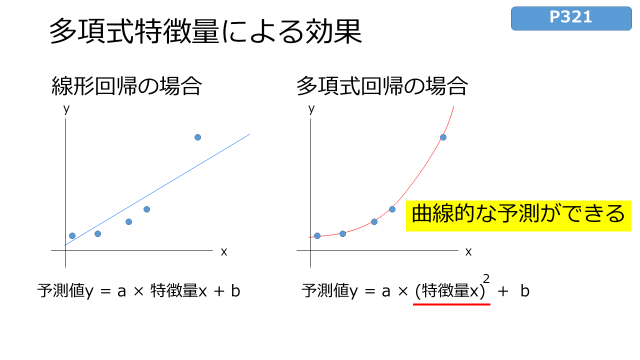

コード8-31 新しい列を特徴量に追加する(P322)

コード8-33 新しい列が追加されたので再学習を行う(P324)

In [ ]:
# RM列を2乗したシリーズを、新しい列'RM2'として、特徴量xに追加する
x['RM2'] = x['RM'] ** 2

# 新しい特徴量での性能を確認(learn関数を特徴量x、正解データtで呼び出す)
s1, s2 = learn(x, t)

# 結果を表示する
print('訓練データでの決定係数:',s1)
print('検証データでの決定係数:',s2)

訓練データでの決定係数: 0.8456207631185567
検証データでの決定係数: 0.8372526287986777


コード8-34 LSTAT列とPTRATIO列で新しい列を特徴量に追加する(P324)

In [ ]:
# LSTAT列を2乗したシリーズを、新しい列'LSTAT2'として、特徴量xに追加する
x['LSTAT2'] = x['LSTAT'] ** 2

# 新しい特徴量での性能を確認(learn関数を特徴量x、正解データtで呼び出す)
s1, s2 = learn(x, t)

# 結果を表示する
print('訓練データでの決定係数:', s1)
print('検証データでの決定係数:', s2)

訓練データでの決定係数: 0.8565689444345094
検証データでの決定係数: 0.8425282632102127


▶実行結果  
訓練データでの決定係数: 0.8565689444345094  
検証データでの決定係数: 0.8425282632102127

In [ ]:
# PTRATIO列を2乗したシリーズを、新しい列'PTRATIO2'として、特徴量xに追加する
x['PTRATIO2'] = x['PTRATIO'] ** 2

# 新しい特徴量での性能を確認(learn関数を特徴量x、正解データtで呼び出す)
s1, s2 = learn(x, t)

# 結果を表示する
print('訓練データでの決定係数:',s1)
print('検証データでの決定係数:',s2)

訓練データでの決定係数: 0.864383498898444
検証データでの決定係数: 0.8678022326740729


▶実行結果  
訓練データでの決定係数: 0.864383498898444  
検証データでの決定係数: 0.8678022326740729

## 交互作用特徴量

コード8-36 交互作用特徴量を追加する(P327)

コード8-37 特徴量を追加したので再学習を行う(P327)

In [ ]:
# RM列 × LSTAT列 の計算結果を、新しい列'RM * LSTAT'として、特徴量xに追加する
x['RM * LSTAT'] = x['RM'] * x['LSTAT']

# 新しい特徴量での性能を確認(learn関数を特徴量x、正解データtで呼び出す)
s1, s2 = learn(x, t)

# 結果を表示する
print('訓練データでの決定係数:',s1)
print('検証データでの決定係数:',s2)

訓練データでの決定係数: 0.8668534967796697
検証データでの決定係数: 0.8739347357775971


▶実行結果  
訓練データでの決定係数: 0.8668534967796697  
検証データでの決定係数: 0.8739347357775971

ここまでの特徴量を使用することにする。  
訓練データ＆検証データ 全体でモデルを作成する

コード8-38 データの標準化後に再学習を行う(P328)

In [ ]:
# 訓練データ＆検証データの特徴量x を標準化するスケーラーを生成し、変数sc_model_x2に代入する
sc_model_x2 = StandardScaler()

# スケーラーに、特徴量xの情報を取得させる
sc_model_x2.fit(x)

# 特徴量xを標準化し、変数sc_xに代入する
sc_x = sc_model_x2.transform(x)

# 訓練データ＆検証データ の正解データを標準化するスケーラーを生成し、変数sc_model_x2に代入する
sc_model_y2 = StandardScaler()

# スケーラーに、正解データyの情報を取得させる
sc_model_y2.fit(t)

# 正解データyを標準化し、変数sc_yに代入する
sc_y = sc_model_y2.transform(t)

# 線形回帰モデルを生成し、変数modelに代入する
model = LinearRegression()

# 標準化した特徴量sc_x、標準化した正解データsc_yを、モデルに学習させる
model.fit(sc_x, sc_y)

LinearRegression()

▶実行結果  
LinearRegression()

## テストデータでの前処理

これまでの前処理
* ダミー変数化　※データ分割前に実施済み
* 欠損値を**訓練＆検証データ**の平均値で穴埋め
* 外れ値の削除　※本当の未知データの予測性能を評価するため削除しない
* RM列、LSTAT列、PTRATIO列、RM列の2乗、LSTAT列の2乗、PTRATIO列の2乗、RM列×LSTAT列を特徴量とする
* PRICE列を正解データとする
* データの標準化

コード8-39 テストデータの前処理 (P329)

コード8-40 決定係数を計算する(P330)

In [ ]:
# テストデータtestに対して、同様の前処理を行う

# testの欠損値を、訓練＆検証データtrain_valの平均値で穴埋めし、変数test2に代入する
test2 = test.fillna(train_val.mean()) 


# test2から特徴量として'RM','LSTAT', 'PTRATIO'を取り出し、変数x_testに代入する
x_test = test2.loc[ :, ['RM','LSTAT', 'PTRATIO'] ]

# x_testの'RM'列を2乗したものを、'RM2'列としてx_testに追加する
x_test['RM2'] = x_test['RM'] ** 2

# x_testの'LSTAT'列を2乗したものを、'LSTAT2'列としてx_testに追加する
x_test['LSTAT2'] = x_test['LSTAT'] ** 2

# x_testの'PTRATIO2'列を2乗したものを、'PTRATIO2'列としてx_testに追加する
x_test['PTRATIO2'] = x_test['PTRATIO'] ** 2

# x_testの 'RM'列×'LSTAT'列 の計算結果を、'RM * LSTAT'列としてx_testに追加する
x_test['RM * LSTAT'] = x_test['RM'] * x_test['LSTAT']

# test2から正解データとして'PRICE'を取り出し、変数y_testに代入する
y_test = test2[['PRICE']]

# x_testを 【訓練＆検証データ】の【特徴量】のスケーラーsc_model_x2で標準化し、変数sc_x_testに代入する
sc_x_test = sc_model_x2.transform(x_test)

# y_testを 【訓練＆検証データ】の【正解データ】のスケーラーsc_model_y2で標準化し、変数sc_y_testに代入する
sc_y_test = sc_model_y2.transform(y_test)

# 標準化したsc_x_test、sc_y_testで決定係数を計算する
model.score(sc_x_test, sc_y_test)

0.7649249353669053

▶実行結果  
0.7649249353669061

予測するには標準化しなければならない  
**StandardScalerオブジェクトもモデルとセットで保存する**

コード8-41 モデルを保存する(P330)

In [ ]:
# pickleをインポート
import pickle

# modelを'boston.pkl'という名前で保存する
with open('boston.pkl',"wb") as f:
    pickle.dump(model,f)

# 特徴量のスケーラーを'boston_scx.pkl'という名前で保存する
with open('boston_scx.pkl','wb') as f:
    pickle.dump(sc_model_x2,f)

# 正解データのスケーラーを'boston_scy.pkl'という名前で保存する
with open('boston_scy.pkl','wb') as f:
    pickle.dump(sc_model_y2,f)

標準化した正解データで学習させたモデルは、予測値も標準化された値になる。  
予測結果を標準化前の値で確認するためには、**逆変換する必要がある**。

**標準化された値を逆変換する**  
scaler**.inverse_transform(値)**

In [ ]:
# 標準化された予測結果を得る
sc_predicted = model.predict(sc_x_test)

sc_predicted

array([[ 0.26783375],
       [ 1.09943012],
       [ 0.22023822],
       [-0.40399061],
       [ 0.38616053],
       [-0.76594044],
       [ 0.2098879 ],
       [ 1.05118896],
       [ 0.11233807],
       [-0.59529787],
       [ 1.18100761],
       [ 3.06710338],
       [-0.32293742],
       [ 1.04286565],
       [-0.15017064],
       [ 3.07938675],
       [-0.58127549],
       [ 0.27573526],
       [ 0.38396003],
       [-0.19538262]])

In [ ]:
# 標準化された結果を逆変換する
predicted = sc_model_y2.inverse_transform(sc_predicted)

predicted

array([[25.06787195],
       [32.79324573],
       [24.62571843],
       [18.82675011],
       [26.16710547],
       [15.46430435],
       [24.52956591],
       [32.34509437],
       [23.62334632],
       [17.04954166],
       [33.55108524],
       [51.07255992],
       [19.57971897],
       [32.26777242],
       [21.18468984],
       [51.1866701 ],
       [17.17980695],
       [25.14127547],
       [26.14666322],
       [20.76467904]])